In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv
import gseapy as gp

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
gdata = sc.read('gdata.h5ad')

In [4]:
sc.pp.neighbors(gdata)
sc.tl.umap(gdata)

In [5]:
sc.tl.leiden(gdata, resolution=0.3) 

In [6]:
gdata.uns['leiden_colors'] = ['#ffbb78','#c4d4df', '#40c2a8', '#f7d323', '#86a1d0',
    '#73dbda','#e87072', '#17becf', '#aec7e8']

<Axes: title={'center': 'leiden'}>

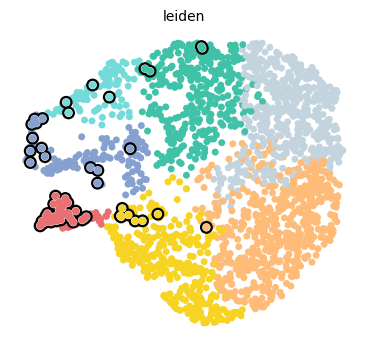

In [7]:
scv.pl.scatter(gdata, basis="umap", color='leiden', add_outline=gdata.obs['annot'].values=='viral gene', size=100, linewidth=2, show=False, figsize=(4.5, 4))

leiden: 4


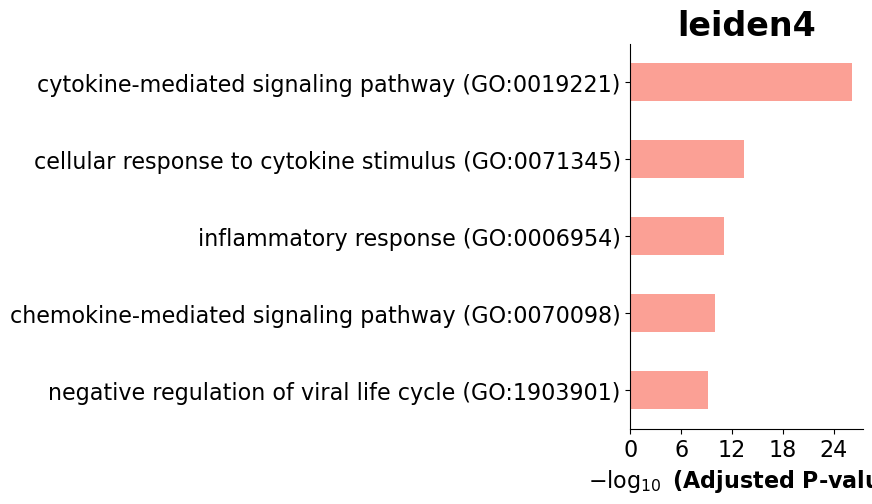

leiden: 5


<Figure size 640x480 with 0 Axes>

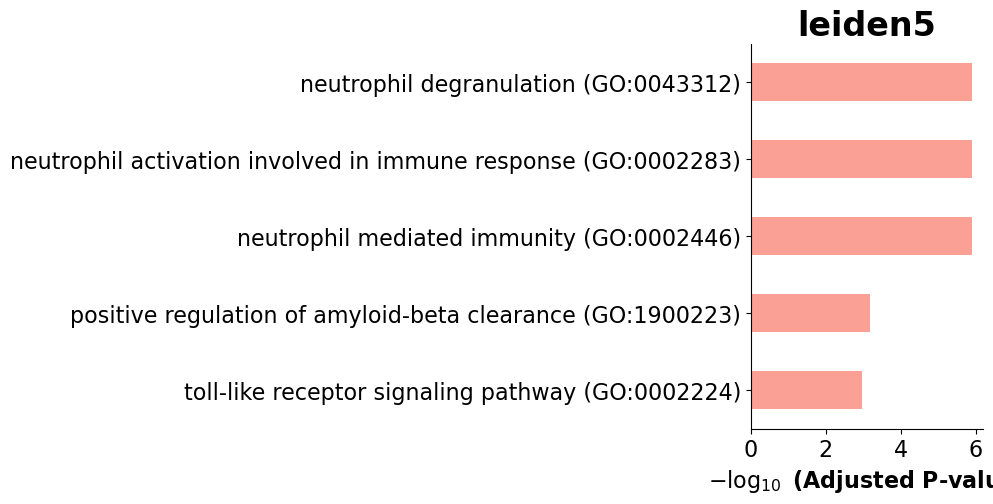

leiden: 3


<Figure size 640x480 with 0 Axes>

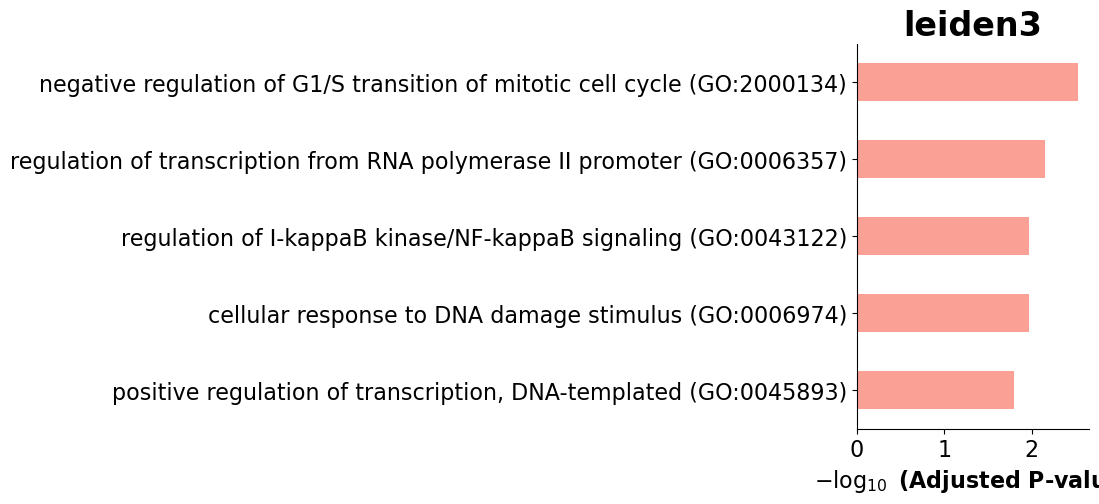

leiden: 6


<Figure size 640x480 with 0 Axes>

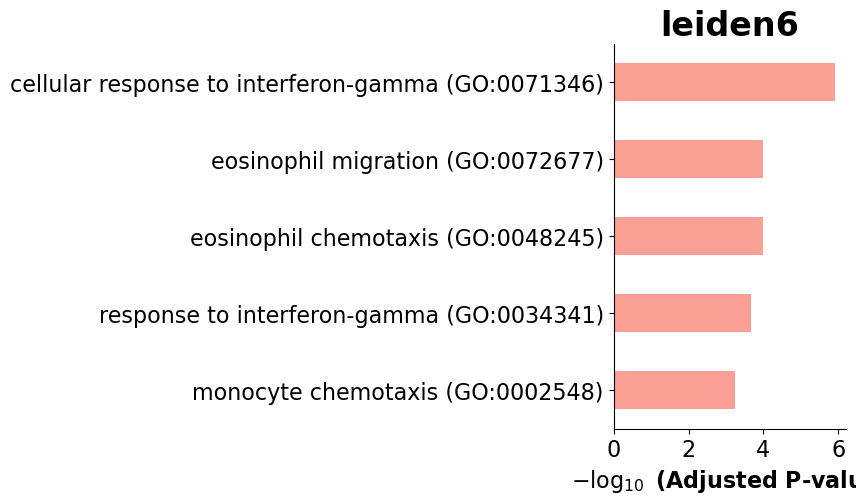

<Figure size 640x480 with 0 Axes>

In [8]:
select_module = ['4', '5', '3', '6']
for i in select_module:
    print(f'leiden: {i}')
    enr=gp.enrichr(gdata[gdata.obs['leiden']==i].obs_names.to_list(), 'GO_Biological_Process_2018')
    try:
        gp.barplot(enr.res2d, figsize=(3,5), top_term=5, title=f'leiden{i}')
        plt.tight_layout()
        # plt.savefig(f'figures/gobp2018_leiden{i}.pdf', dpi=300, transparent=300)
        plt.show()
        plt.clf()
    except:
        print('visualization failed')

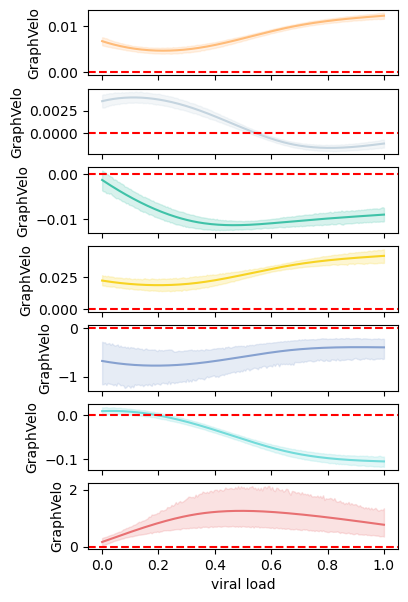

In [ ]:
t = np.linspace(0, 1, gdata.n_vars)
gs = [gdata[gdata.obs['leiden']==g] for g in gdata.obs['leiden'].cat.categories]
fig, axs = plt.subplots(len(gs), 1, figsize=(4, 9), sharex=True)
for i, data in enumerate(gs):
    X = data.X
    df = pd.DataFrame(
        {'viral load': t.tolist()*len(X),
         'GraphVelo': X.flatten(),
        #  'name': names
         }
    )
    sns.lineplot(data=df, x='viral load', y='GraphVelo',color=gdata.uns['leiden_colors'][i], ax=axs[i])
    axs[i].axhline(y=0, color='red', linestyle='--')
    # plt.savefig(f'./figures/gv_trend_leiden.pdf', transparent=True, dpi=300)
plt.show()